In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 


Bad key text.latex.preview in file /Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, lin

In [2]:
df = pd.read_csv("train.csv")

In [129]:
df

,id,qid1,qid2,question1,question2,is_duplicate
55703,55703,98176,98177,How much time it takes to die by hanging?,Can a person die if hung upside down for too l...,1
89165,89165,149857,149858,"When we use to "" Think "" what kind of actions ...",How our brain works when We think of random st...,1
348755,348757,477335,477336,What is the international mathematics day?,What is an average day of a PhD student in mat...,1
326112,326114,2508,48346,What are your views on the ban of Rs 500 and R...,What are your views on PM Modi's decision on d...,1
364908,364911,494989,494990,I would like to experience an SMS chatbot. Has...,I am creating an app like Instagram. Would usi...,1
...,...,...,...,...,...,...
170045,170046,263013,263014,Can I mix coconut oil with mustard oil and cas...,Can I use coconut oil daily to my scalp?,1
358237,358239,487691,487692,What are the best aspects of living in Maturin...,What could the first world countries achieve i...,1
250827,250829,364818,364819,"Is the proper spelling of this word capiche, c...",What's the proper spelling/meaning/usage for t...,1
49394,49394,87915,87916,What are some of the most accurate documentari...,What are the most factually accurate documenta...,1


In [3]:
df.shape

(404290, 6)

In [4]:
df.shape

(404290, 6)

In [5]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


Conclusion -> Binary classification 


In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [7]:
df=df.dropna()


In [8]:
df = df.reset_index(drop = True)


In [9]:
df = df.sample(70000)


In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

#### Distribution of duplicate and non-duplicate elements    -> 0 and 1

In [12]:
print(df['is_duplicate'].value_counts())

0    44235
1    25765
Name: is_duplicate, dtype: int64


In [13]:
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count())    # unbalanced more non related

0    0.631929
1    0.368071
Name: is_duplicate, dtype: float64


### Number of repeated quesions

Sort According to qid

Total

In [14]:
qid_total = pd.Series(  df['qid1'].to_list()  +  df['qid2'].to_list())

In [15]:
print(qid_total.shape)

(140000,)


#### greater than once -> Duplicate

In [16]:
x= qid_total.value_counts()>1

In [17]:
print(x[x].shape)

(11778,)


## Histogram of freq of questions

<function matplotlib.pyplot.show(close=None, block=None)>

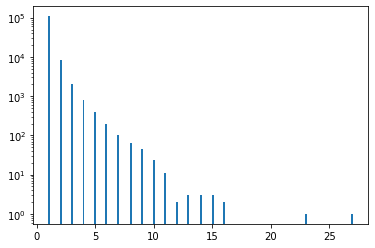

In [18]:
plt.hist(qid_total.value_counts().values, bins =160)
plt.yscale('log')
plt.show

In [19]:
ques_df =df[['question1','question2']]
ques_df.head()

,question1,question2
55703,How much time it takes to die by hanging?,Can a person die if hung upside down for too l...
89165,"When we use to "" Think "" what kind of actions ...",How our brain works when We think of random st...
348755,What is the international mathematics day?,What is an average day of a PhD student in mat...
326112,What are your views on the ban of Rs 500 and R...,What are your views on PM Modi's decision on d...
364908,I would like to experience an SMS chatbot. Has...,I am creating an app like Instagram. Would usi...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


In [21]:
# Merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv =CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)   # transform to get bag of words 

In [22]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df. index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd. concat ([temp_df1, temp_df2], axis=1)
temp_df.shape

(70000, 6000)

In [23]:
# Sparse array

In [24]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
55703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326112,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
364908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
temp_df['is_Duplicate']=df['is_duplicate']

In [26]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_Duplicate
55703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
348755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326112,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
364908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training wothout preprocessing and feature eng

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-pack

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_pred = rf.predict(x_test)

/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
accuracy_score(y_test,y_pred)






0.7410714285714286

### From XgBoast 

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test, y_pred)

TypeError: predict() takes 2 positional arguments but 3 were given

In [144]:

    q1_tbow= cv.transform([q1]).toarray()
    q2_tbow = cv.transform([q2]).toarray()


In [145]:
t_df1 = pd.DataFrame(q1_tbow)
t_df2 = pd.DataFrame(q2_tbow)
t_df = pd.concat ([t_df1, t_df2], axis=1)
t_df.shape

(1, 6000)

In [146]:
q1_tbow

array([[0, 0, 0, ..., 0, 0, 0]])

In [142]:
q1 = 'How do I post a trending post on Quora?'
q2= 'How do I post in Quora?'

In [147]:
print(rf.predict(t_df))

[0]


/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/harshitsingh/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/sklearn/utils/fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
